In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import pandas as pd

In [14]:
arms = np.random.normal(0, 1, 10)
optimal = np.argmax(arms)
arms

array([ 2.11776922,  0.28409242,  1.76857929, -0.50281877,  0.97857819,
       -0.23885693, -0.4046603 , -0.90382839, -0.27904422,  0.11854809])

In [3]:
def get_reward(action):
    return np.random.normal(arms[action], 1)

def update_Q(Q, reward, n):
    return Q + (reward - Q) / n

In [6]:
def run(e, n_steps=1000, n_iters=2000, oiv=0, ucb=False):
    
    stime = time.time()
    rewards = np.zeros(n_steps)
    optimals = np.zeros(n_steps)
    iters = 0
    alpha = 0.1
    c = 2
    
    print("run e=%f"%e)

    while iters < n_iters:

        if iters % 100 == 0: print("%d/%d iters"%(iters, n_iters))

        steps = 0
        Qs = np.ones(10) * oiv
        n_chooses = np.ones(10) * 0.0001

        while steps < n_steps:
            if ucb: A = np.argmax(Qs + c * np.sqrt(np.log(steps+1)/n_chooses))
            elif np.random.rand() > e: A = np.argmax(Qs) #np.random.choice(np.argwhere(Qs == np.amax(Qs)).flatten(), 1)
            else: A = np.random.randint(10)

            n_chooses[A] += 1
            reward = get_reward(A)
            Qs[A] = Qs[A] + alpha * (reward - Qs[A])

            rewards[steps] += reward
            if A == np.argmax(arms):
                optimals[steps] += 1
            steps += 1

        iters += 1
        
    print("done in %fs \n"%(time.time()-stime))
    
    return rewards/n_iters, optimals/n_iters


In [17]:
result = [0, 0, 0]
result[0] = run(0.1, 1000, 2000, 0)
result[1] = run(0, 1000, 2000, 5)
result[2] = run(0, 1000, 2000, 0, True)

run e=0.100000
0/2000 iters
100/2000 iters
200/2000 iters
300/2000 iters
400/2000 iters
500/2000 iters
600/2000 iters
700/2000 iters
800/2000 iters
900/2000 iters
1000/2000 iters
1100/2000 iters
1200/2000 iters
1300/2000 iters
1400/2000 iters
1500/2000 iters
1600/2000 iters
1700/2000 iters
1800/2000 iters
1900/2000 iters
done in 158.722039s 

run e=0.000000
0/2000 iters
100/2000 iters
200/2000 iters
300/2000 iters
400/2000 iters
500/2000 iters
600/2000 iters
700/2000 iters
800/2000 iters
900/2000 iters
1000/2000 iters
1100/2000 iters
1200/2000 iters
1300/2000 iters
1400/2000 iters
1500/2000 iters
1600/2000 iters
1700/2000 iters
1800/2000 iters
1900/2000 iters
done in 128.172782s 

run e=0.000000
0/2000 iters
100/2000 iters
200/2000 iters
300/2000 iters
400/2000 iters
500/2000 iters
600/2000 iters
700/2000 iters
800/2000 iters
900/2000 iters
1000/2000 iters
1100/2000 iters
1200/2000 iters
1300/2000 iters
1400/2000 iters
1500/2000 iters
1600/2000 iters
1700/2000 iters
1800/2000 iters
190

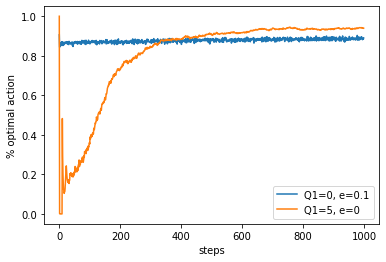

In [18]:
plt.plot(range(1000), result[0][1])
plt.plot(range(1000), result[1][1])

plt.legend(['Q1=0, e=0.1', 'Q1=5, e=0'])
plt.xlabel("steps")
plt.ylabel("% optimal action")

plt.show()

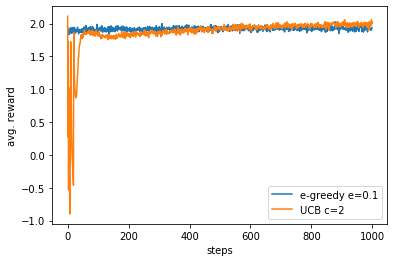

In [19]:
plt.plot(range(1000), result[0][0])
plt.plot(range(1000), result[2][0])

plt.legend(['e-greedy e=0.1', 'UCB c=2'])
plt.xlabel("steps")
plt.ylabel("avg. reward")

plt.show()